<h1>House Prices Prediction Project</h1>

<h2>Introduction</h2>

The project employs advanced machine learning regression techniques to predict the sales price of residential homes in Ames, Iowa. This regression-type problem involves predicting a continuous variable, which is the sales price of the houses in the dataset, based on the input features provided in the dataset.

<h2>Exploratory Data Analysis (EDA)</h2>

Before building the machine learning model, I have conducted exploratory data analysis (EDA) to achieve the following objectives:

* Gain insights into the dataset.
* Clean and preprocess the data to make it suitable for model building.

In the EDA phase, I examined various aspects of the data to better understand its characteristics and potential patterns. This analysis will inform subsequent steps in constructing a house price prediction model.

EDA served as a crucial step in cleaning and preprocessing the data. By identifying and addressing missing values, outliers, and other anomalies, I ensured that the data is in optimal condition for model construction.

The insights and discoveries made during this analysis phase will play a pivotal role in guiding the subsequent steps of constructing a robust house price prediction model.


In [181]:
#Load libraries into code environment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [182]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [183]:
#Load datasets into code environment and preview
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
            
#Preview the contents of the dataset
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [184]:
#Check for null values
print(train_data.isnull().sum().sort_values(ascending=False).head(20))
print(test_data.isnull().sum().sort_values(ascending=False).head(35))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1


In [185]:
#Drop columns with excess null values
null_columns = ["PoolQC", "MiscFeature", "Alley", "Fence"] 
train_data = train_data.drop(columns = null_columns)
test_data = test_data.drop(columns = null_columns)

In [186]:
print(train_data.isnull().sum().sort_values(ascending=False).head(20))
print(test_data.isnull().sum().sort_values(ascending=False).head(30))

MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
Electrical        1
BsmtFullBath      0
Functional        0
TotRmsAbvGrd      0
GrLivArea         0
HalfBath          0
dtype: int64
MasVnrType      894
FireplaceQu     730
LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFullBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
MoSold 

In [187]:
#Handle the mising values in the garage columns
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train_data[garage_cols] = train_data[garage_cols].fillna("NA")
test_data[garage_cols] = test_data[garage_cols].fillna("NA")

#Handle missing data in electrical column
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode().iloc[0])
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode().iloc[0])

#Handle the missing data in the masonry veeneer area column
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode().iloc[0])
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode().iloc[0])

#Handle missing data in the Basement columns
basement_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtFinType1'] 
train_data[basement_cols] = train_data[basement_cols].fillna("NA")
test_data[basement_cols] = train_data[basement_cols].fillna("NA")

#Handle missing data in the Fireplace Quality column
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna("NA")
test_data['FireplaceQu'] = train_data['FireplaceQu'].fillna("NA")

#Handle missing data in the MasVnrType column
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('NA')
test_data['MasVnrType'] = train_data['MasVnrType'].fillna('NA')

In [188]:
#Handle the remaining missing data in the test data

# List of column names with missing values
columns_with_missing_values = ['MSZoning', 'BsmtFullBath', 'Functional', 'Utilities',
       'BsmtFinSF1', 'GarageCars', 'Exterior1st', 'KitchenQual',
       'TotalBsmtSF', 'SaleType']

# Fill missing values with the mode for each column
for column in columns_with_missing_values:
    mode = test_data[column].mode().iloc[0]  
    test_data[column].fillna(mode, inplace=True) 

In [189]:
#Check the relationship between the year the garage quality and condition
are_equal = train_data['GarageQual'] == train_data['GarageCond']

if are_equal.all():
    print("The content of 'GarageQual' and 'GarageCond' is the same.")
else:
    print("The content of 'GarageQual' and 'GarageCond' is not the same.")
    
are_equal.value_counts()

The content of 'GarageQual' and 'GarageCond' is not the same.


True     1401
False      59
Name: count, dtype: int64

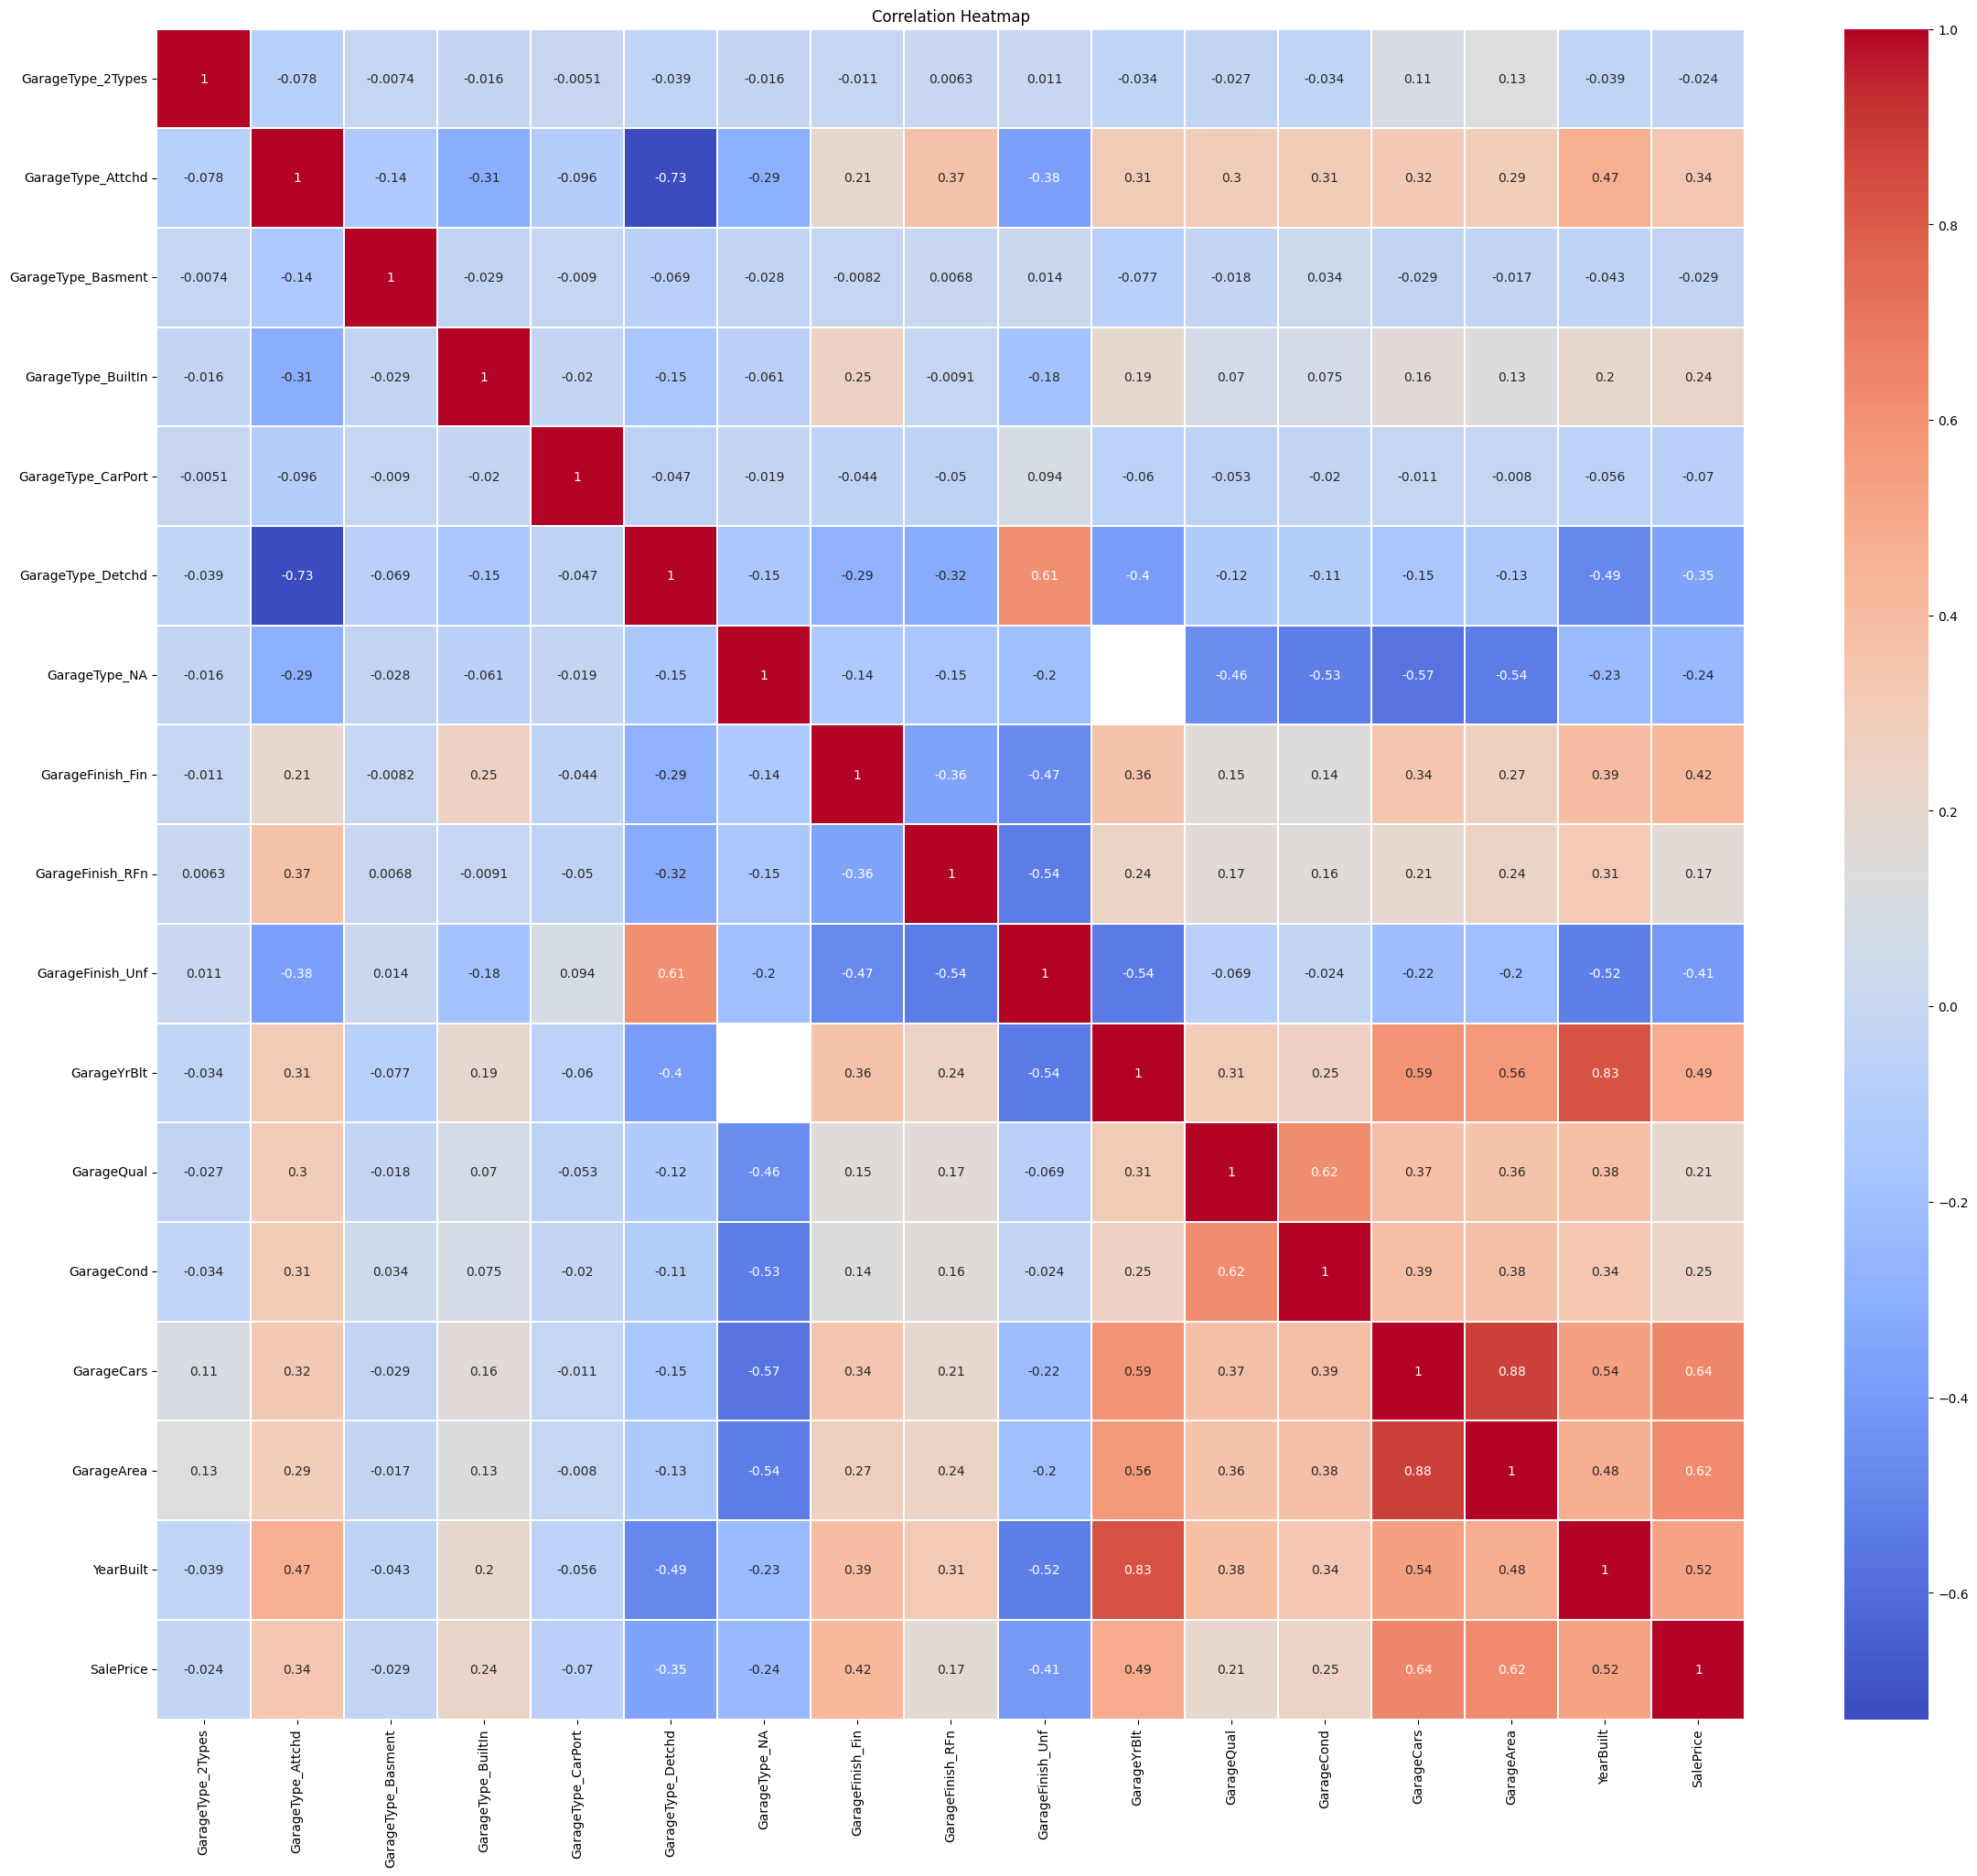

In [190]:
#Convert categorical data to numeric
train_data = pd.get_dummies(train_data, columns=['GarageType', 'GarageFinish'])
test_data = pd.get_dummies(test_data, columns=['GarageType', 'GarageFinish'])

le = LabelEncoder()

train_data['GarageQual'] = le.fit_transform(train_data['GarageQual'])
train_data['GarageCond'] = le.fit_transform(train_data['GarageCond'])

test_data['GarageQual'] = le.fit_transform(test_data['GarageQual'])
test_data['GarageCond'] = le.fit_transform(test_data['GarageCond'])

#Correlation analysis between the garage related columns and the target variable
target_variable = 'SalePrice'

columns_of_interest = ['GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 
                       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 
                       'GarageType_NA', 'GarageFinish_Fin', 'GarageFinish_RFn', 
                       'GarageFinish_Unf', 'GarageYrBlt', 'GarageQual', 'GarageCond',
                       'GarageCars', 'GarageArea', 'YearBuilt']

garage_df = train_data[columns_of_interest + [target_variable]]

correlation_matrix = garage_df.corr()

#Visualize correlation analysis using heatmap
plt.figure(figsize=(28, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.30)
plt.title('Correlation Heatmap')
plt.show()

In [191]:
#Check the relationship between the year the house was built and the year garage was built
are_equal = train_data['GarageYrBlt'] == train_data['YearBuilt']

if are_equal.all():
    print("The content of 'GarageYrBlt' and 'YearBuilt' is the same.")
else:
    print("The content of 'GarageYrBlt' and 'YearBuilt' is not the same.")
    
are_equal.value_counts()

The content of 'GarageYrBlt' and 'YearBuilt' is not the same.


True     1089
False     371
Name: count, dtype: int64

In [192]:
# Drop the garage related columns with low correlation to the target variable

col_to_drop1 = ['GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 
                       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 
                       'GarageType_NA', 'GarageFinish_Fin', 'GarageFinish_NA', 'GarageFinish_RFn', 
                       'GarageFinish_Unf', 'GarageArea', 'GarageYrBlt', 'GarageQual']

train_data = train_data.drop(col_to_drop1, axis=1)
test_data = test_data.drop(col_to_drop1, axis=1)

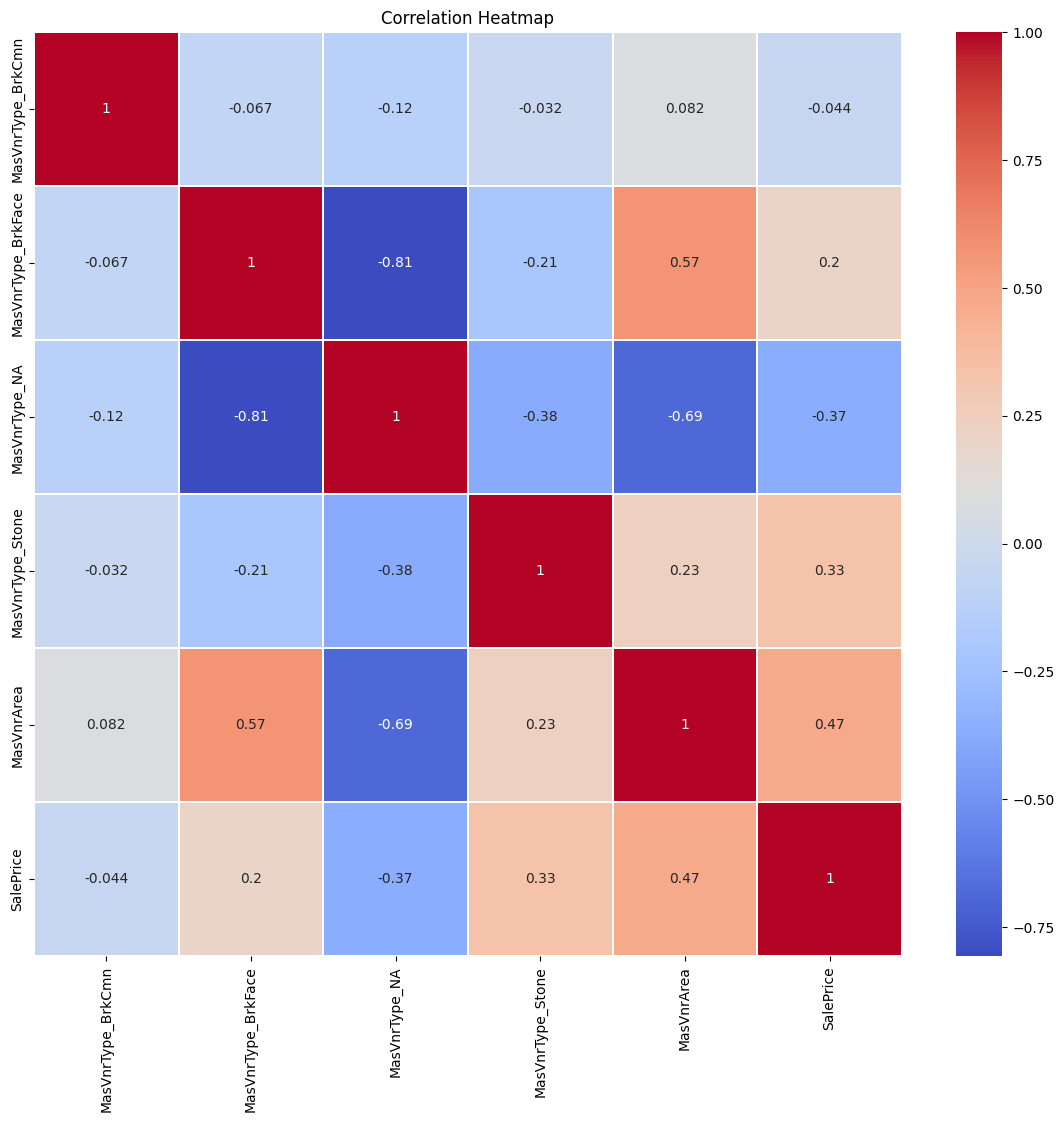

In [193]:
#Correlation analysis between the masvnr related columns and the target variable
masvnr_cols = ['MasVnrArea', 'MasVnrType']

#Convert categorical data to numeric
train_data = pd.get_dummies(train_data, columns=['MasVnrType'])
test_data = pd.get_dummies(test_data, columns=['MasVnrType'])

target_variable = 'SalePrice'
columns_of_interest1 = ['MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 
                        'MasVnrType_NA', 'MasVnrType_Stone', 
                        'MasVnrArea']
masvnr_df = train_data[columns_of_interest1 + [target_variable]]

correlation_matrix1 = masvnr_df.corr()

#Visualize correlation analysis using heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.30)
plt.title('Correlation Heatmap')
plt.show()

In [194]:
#Drop the masonry columns that have little to no effect on the sale price
col_to_drop2 = ['MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 
                'MasVnrType_NA', 'MasVnrType_Stone']

train_data = train_data.drop(col_to_drop2, axis=1)
test_data = test_data.drop(col_to_drop2, axis=1)


In [195]:
#Check the relationship between the year the basement quality and condition
are_equal = train_data['BsmtQual'] == train_data['BsmtCond']

if are_equal.all():
    print("The content of 'BsmtQual' and 'BsmtCond' is the same.")
else:
    print("The content of 'BsmtQual' and 'BsmtCond' is not the same.")
    
are_equal.value_counts()

The content of 'BsmtQual' and 'BsmtCond' is not the same.


False    783
True     677
Name: count, dtype: int64

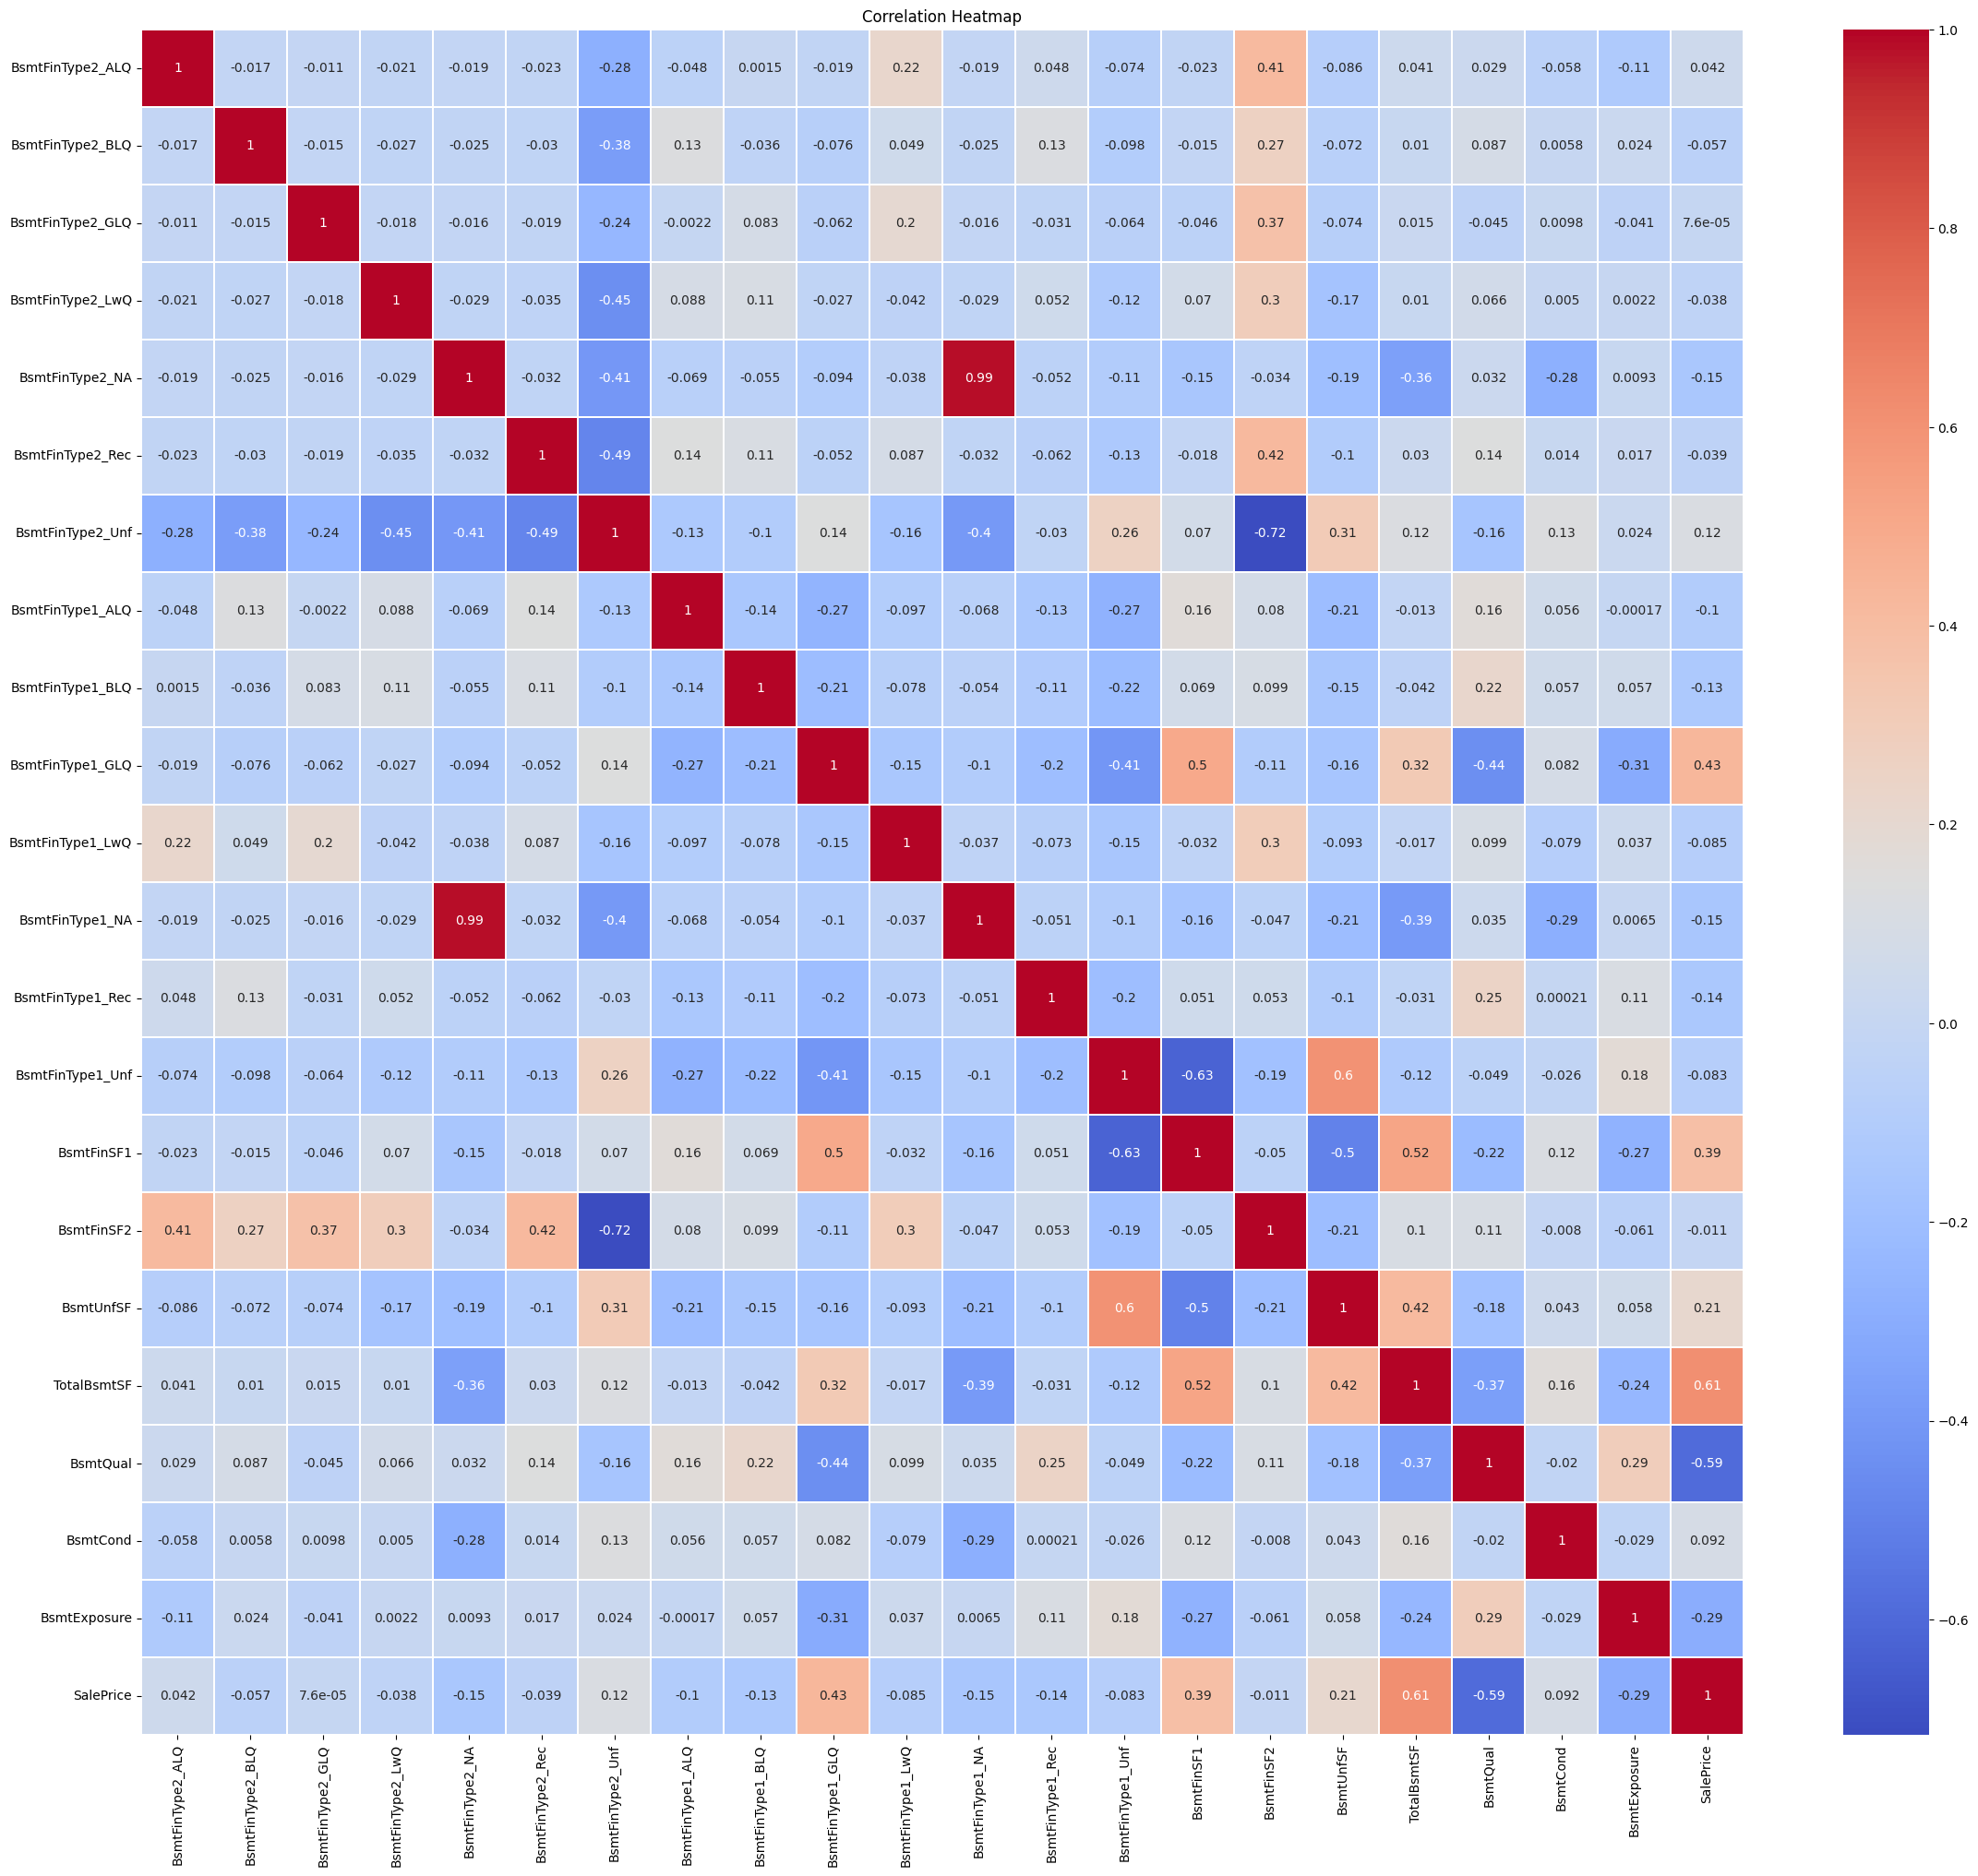

In [196]:
#Correlation analysis between the basement related columns and the target variable
basement_cols = ['BsmtFinType1', 'BsmtFinType2'] 

#Convert categorical data to numeric
train_data = pd.get_dummies(train_data, columns=basement_cols)
test_data = pd.get_dummies(test_data, columns=basement_cols)

train_data['BsmtQual'] = le.fit_transform(train_data['BsmtQual'])
train_data['BsmtCond'] = le.fit_transform(train_data['BsmtCond'])
train_data['BsmtExposure'] = le.fit_transform(train_data['BsmtExposure'])


test_data['BsmtQual'] = le.fit_transform(test_data['BsmtQual'])
test_data['BsmtCond'] = le.fit_transform(test_data['BsmtCond'])
test_data['BsmtExposure'] = le.fit_transform(test_data['BsmtExposure'])

bsmt_col = ['BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 
            'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NA', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure']

bsmt_df = train_data[bsmt_col + [target_variable]]

correlation_matrix2 = bsmt_df.corr()

#Visualize correlation analysis using heatmap
plt.figure(figsize=(28, 24))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.30)
plt.title('Correlation Heatmap')
plt.show()



In [197]:
#Drop the basement columns that have little to no effect on the sale price
col_to_drop3 = ['BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
                'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NA', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
                'BsmtFinSF2', 'BsmtUnfSF', 'BsmtCond']

train_data = train_data.drop(columns=col_to_drop3, axis=1)
test_data = test_data.drop(columns=col_to_drop3, axis=1)


In [198]:
#Group the train data by the month and year each house was sold
monthly_prices = train_data.groupby('MoSold')['SalePrice'].mean()

yearly_prices =train_data.groupby('YrSold')['SalePrice']

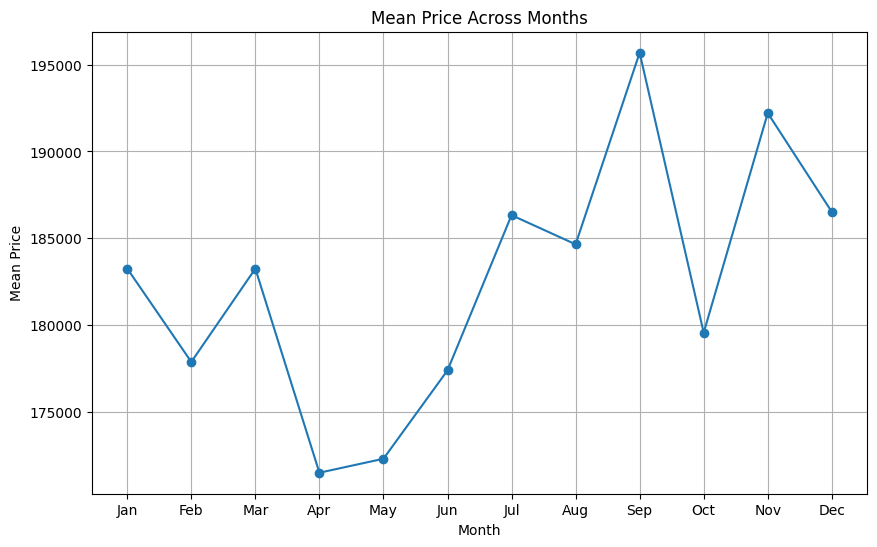

In [199]:
#Visualize to check for patterns in the sale price for each month 
plt.figure(figsize=(10, 6))
monthly_prices.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.title('Mean Price Across Months')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

/tmp/ipykernel_32/3276067132.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=year_data, x='MoSold', y='SalePrice', label=f'Year {year}', ci=None)
/tmp/ipykernel_32/3276067132.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=year_data, x='MoSold', y='SalePrice', label=f'Year {year}', ci=None)
/tmp/ipykernel_32/3276067132.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=year_data, x='MoSold', y='SalePrice', label=f'Year {year}', ci=None)
/tmp/ipykernel_32/3276067132.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=year_data, x='MoSold', y='SalePrice', label=f'Year {year}', ci=None)
/tmp/ipykernel_32/3276067132.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


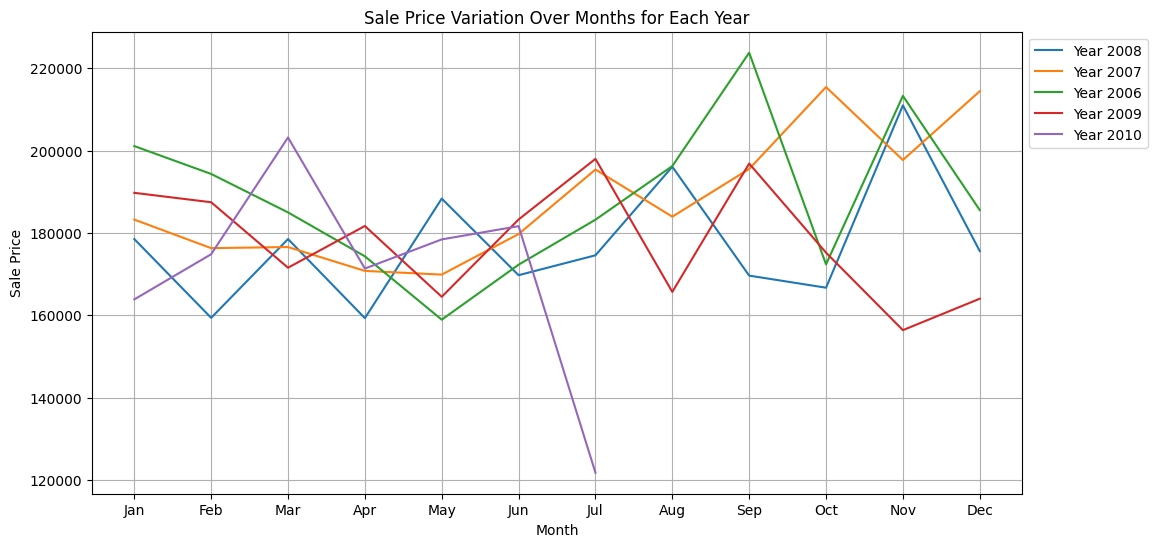

In [200]:
#Visualize to check for patterns in the sale price for each year 
plt.figure(figsize=(12, 6))

#Iterate through the unique years in your dataset
for year in train_data['YrSold'].unique():
    # Filter the data for the current year
    year_data = train_data[train_data['YrSold'] == year]
    
    # Create a line plot for the current year
    sns.lineplot(data=year_data, x='MoSold', y='SalePrice', label=f'Year {year}', ci=None)

plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.title('Sale Price Variation Over Months for Each Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

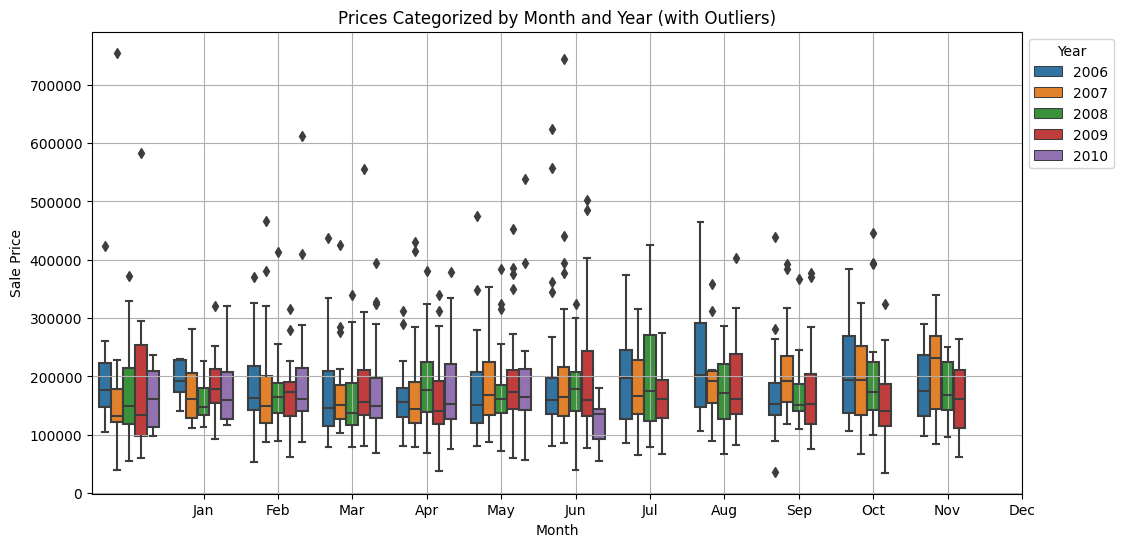

In [201]:
# Create a box plot to visualize prices by month and year
plt.figure(figsize=(12, 6))

# Initialize the box plot
sns.boxplot(data=train_data, x='MoSold', y='SalePrice', hue='YrSold', whis=1.5)

plt.xlabel('Month')
plt.ylabel('Sale Price')
plt.title('Prices Categorized by Month and Year (with Outliers)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [202]:
#Drop the month and year columns as they have very little to no correlation to the target
train_data = train_data.drop(columns=['MoSold', 'YrSold'])
test_data = test_data.drop(columns=['MoSold', 'YrSold'])

In [203]:
#Handle missing data in LotFrontage column using K nearest neighbors

# Import the KNNImputer
from sklearn.impute import KNNImputer  

# Initialize the K-NN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Select the column with missing data
column_to_impute = 'LotFrontage'

train_data[[column_to_impute]] = knn_imputer.fit_transform(train_data[[column_to_impute]])
test_data[[column_to_impute]] = knn_imputer.fit_transform(test_data[[column_to_impute]])


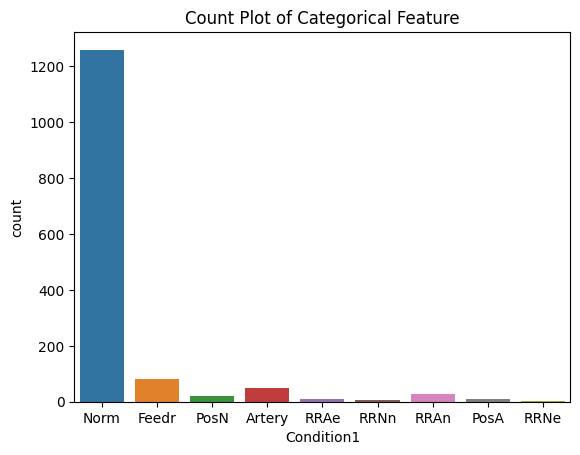

In [204]:
sns.countplot(x='Condition1', data=train_data)
plt.title('Count Plot of Categorical Feature')
plt.show()

In [205]:
#Check the relationship between the overall quality and condition of the house
are_equal = train_data['OverallCond'] == train_data['OverallQual']

if are_equal.all():
    print("The content of 'OverallCond' and 'OverallQual' is the same.")
else:
    print("The content of 'OverallCond' and 'OverallQual' is not the same.")
    
are_equal.value_counts()

The content of 'OverallCond' and 'OverallQual' is not the same.


False    1186
True      274
Name: count, dtype: int64

In [206]:
#Check the relationship between the year the houses were built and remodelled
are_equal = train_data['YearBuilt'] == train_data['YearRemodAdd']

if are_equal.all():
    print("The content of 'YearBuilt' and 'YearRemodAdd' is the same.")
else:
    print("The content of 'YearBuilt' and 'YearRemodAdd' is not the same.")
    
are_equal.value_counts()

The content of 'YearBuilt' and 'YearRemodAdd' is not the same.


True     764
False    696
Name: count, dtype: int64

In [207]:
#Check the relationship between the year the exterior covering of the houses
are_equal = train_data['Exterior1st'] == train_data['Exterior2nd']

if are_equal.all():
    print("The content of 'Exterior1st' and 'Exterior2nd' is the same.")
else:
    print("The content of 'Exterior1st' and 'Exterior2nd' is not the same.")
    
are_equal.value_counts()


The content of 'Exterior1st' and 'Exterior2nd' is not the same.


True     1245
False     215
Name: count, dtype: int64

In [208]:
# Drop the Exterior2nd column

train_data = train_data.drop(columns=['Exterior2nd'])
test_data = test_data.drop(columns=['Exterior2nd'])


In [209]:
#Check the relationship between the year the exterior condition and quality of the houses
are_equal = train_data['ExterQual'] == train_data['ExterCond']

if are_equal.all():
    print("The content of 'ExterQual' and 'ExterCond' is the same.")
else:
    print("The content of 'ExterQual' and 'ExterCond' is not the same.")
    
are_equal.value_counts()


The content of 'ExterQual' and 'ExterCond' is not the same.


True     815
False    645
Name: count, dtype: int64

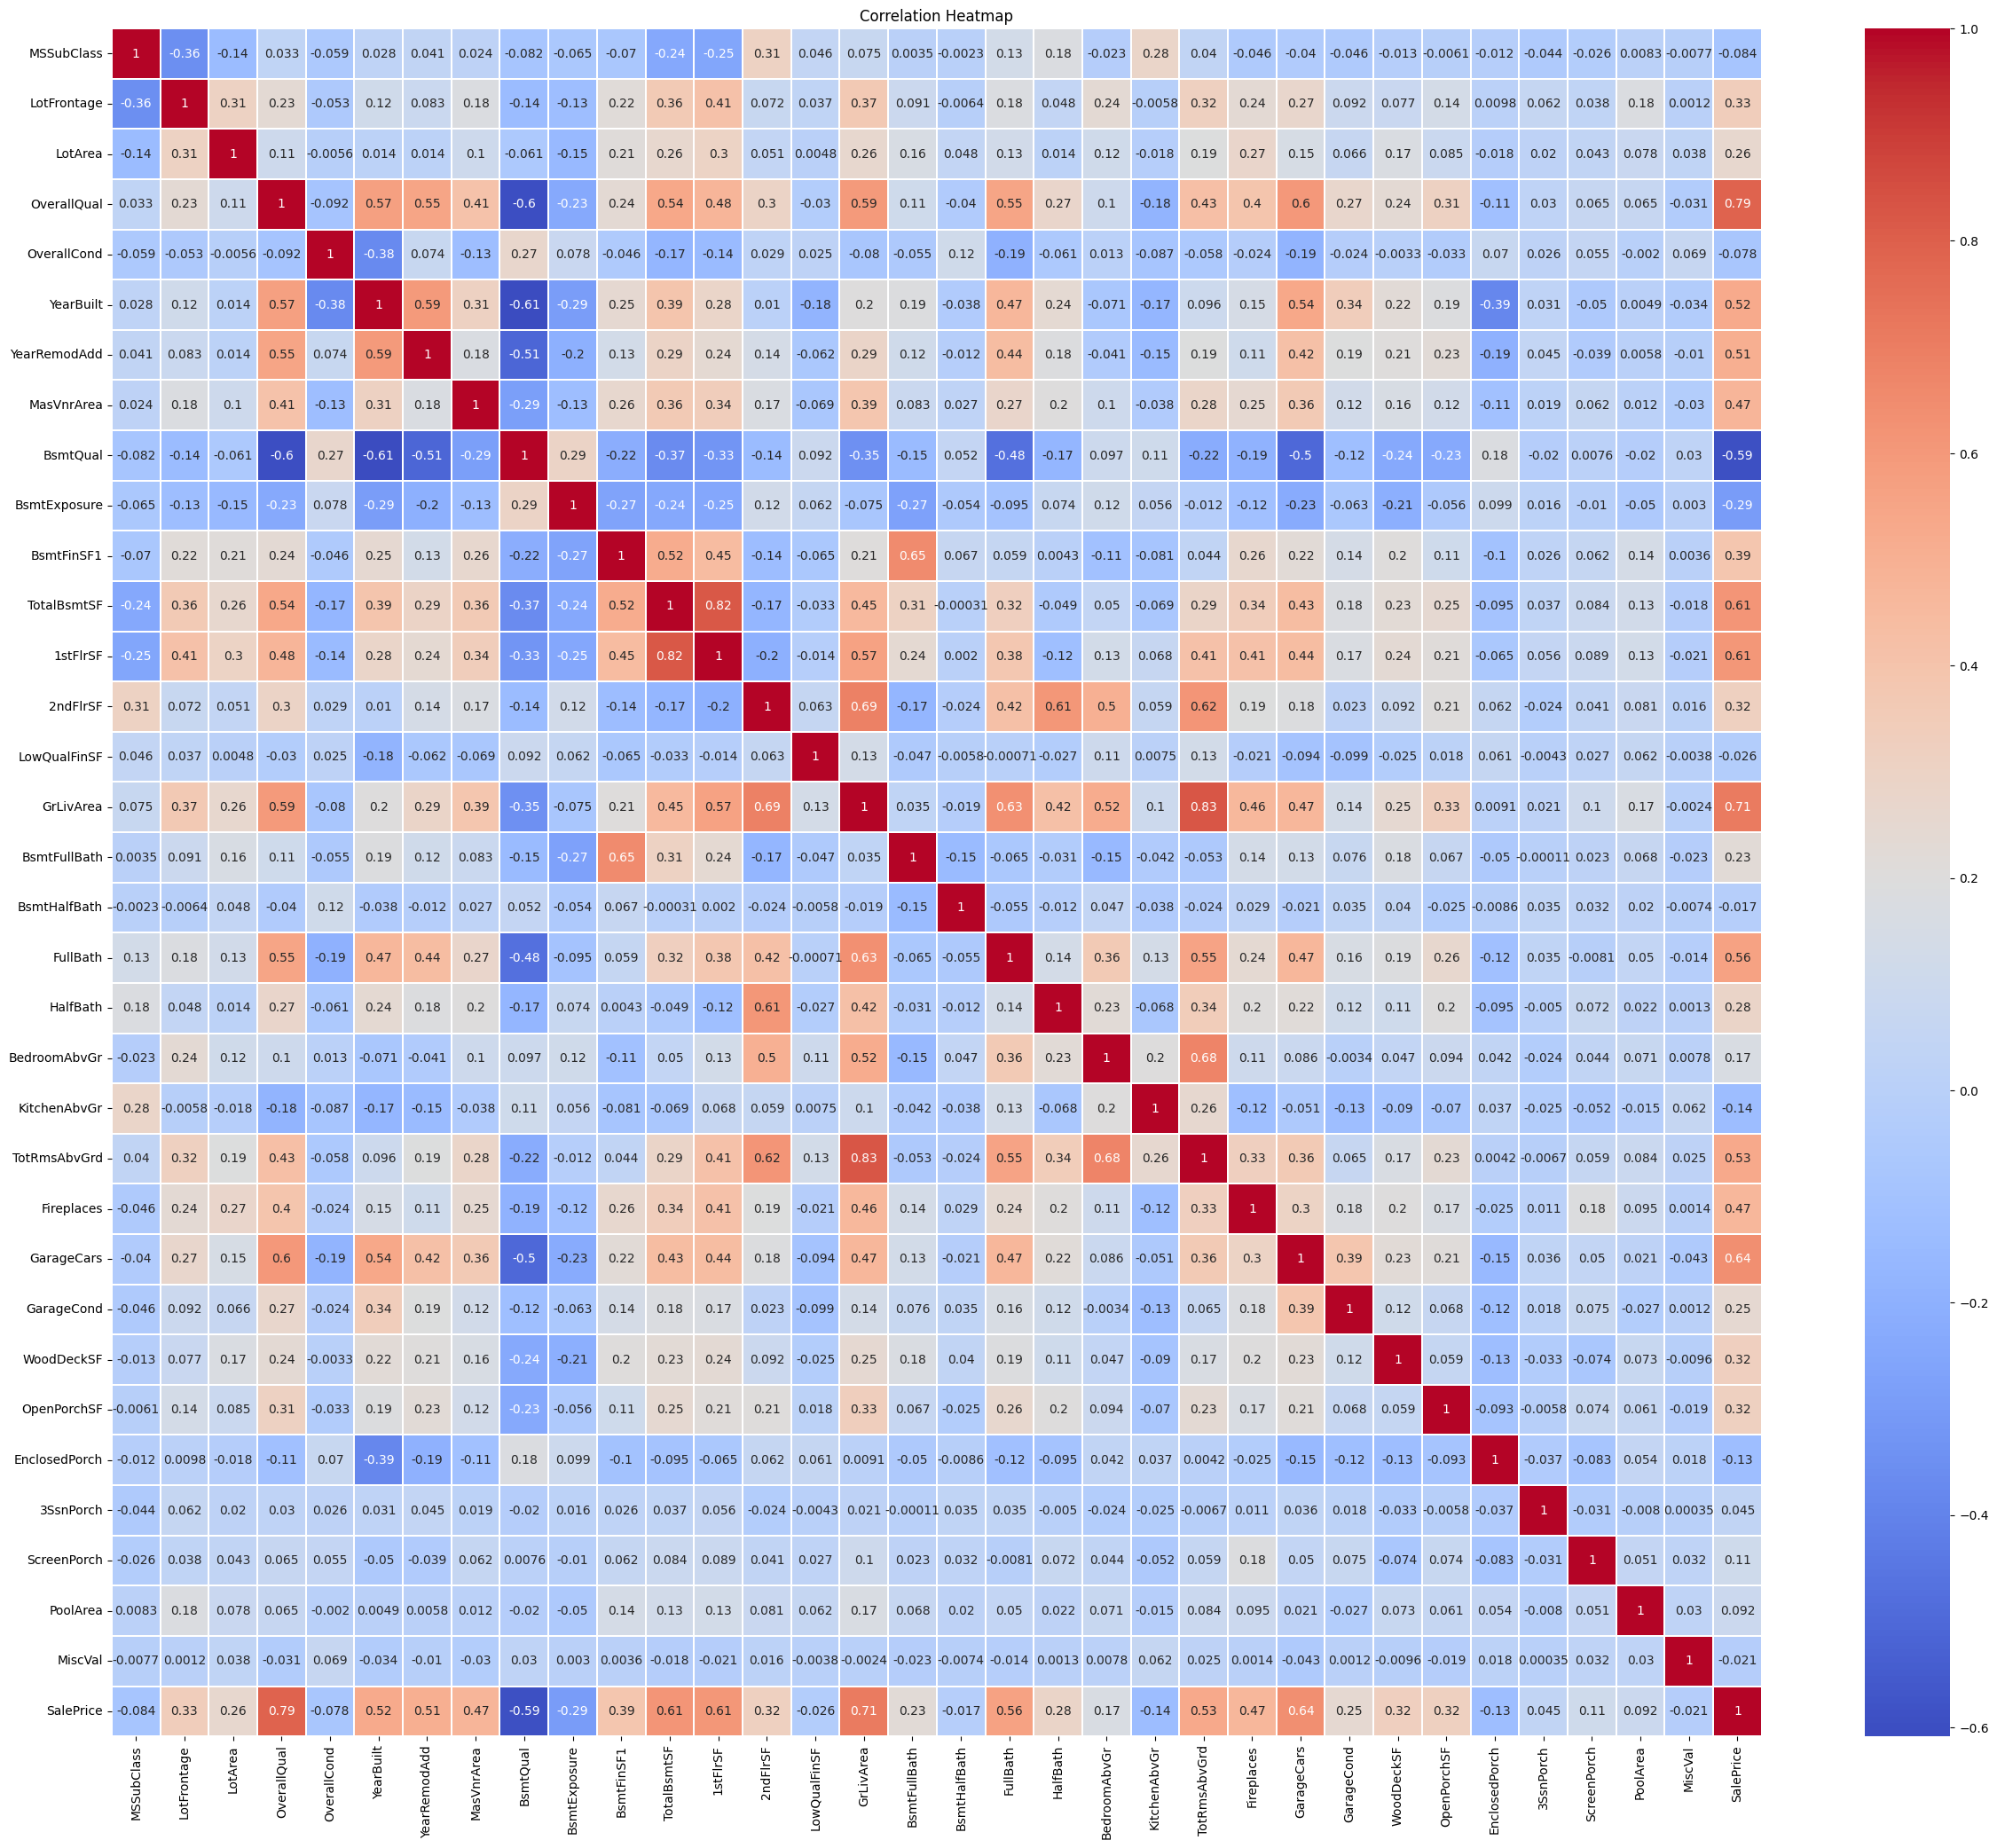

In [210]:
#Correlation analysis between some of the remaining features


target_variable = 'SalePrice'

columns_of_interest5 = ['MSSubClass', 'LotFrontage', 'LotArea', 
                        'OverallQual', 'OverallCond', 'YearBuilt', 
                        'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 
                        'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 
                        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                        'FullBath', 'HalfBath', 'BedroomAbvGr', 
                        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                        'GarageCars', 'GarageCond', 'WoodDeckSF', 
                        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                        'ScreenPorch', 'PoolArea', 'MiscVal']

cols_df = train_data[columns_of_interest5 + [target_variable]]

correlation_matrix5 = cols_df.corr()

#Visualize correlation analysis using heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix5, annot=True, cmap='coolwarm', linewidths=0.30)
plt.title('Correlation Heatmap')
plt.show()

In [211]:
train_data = train_data.drop(columns=['MSSubClass', 'OverallCond', 'LowQualFinSF', 
                                      'BsmtHalfBath', '3SsnPorch', 'PoolArea','MiscVal'])

test_data = test_data.drop(columns=['MSSubClass', 'OverallCond', 'LowQualFinSF', 
                                      'BsmtHalfBath', '3SsnPorch', 'PoolArea','MiscVal'])

In [212]:
# Get a summary of data types for all columns
data_types = train_data.dtypes

# Identify categorical columns (object data type) and numerical columns
categorical_columns = data_types[data_types == 'object']
numerical_columns = data_types[data_types != 'object']

In [213]:
# Count the number of categorical and numerical columns
num_categorical_columns = categorical_columns.shape[0]
num_numerical_columns = numerical_columns.shape[0]

In [214]:
# List the names of categorical and numerical columns
categorical_column_names = categorical_columns.index.tolist()
numerical_column_names = numerical_columns.index.tolist()

print(f"Number of Categorical Columns: {num_categorical_columns}")
print(f"Number of Numerical Columns: {num_numerical_columns}")
print("Categorical Columns:", categorical_column_names)
print("Numerical Columns:", numerical_column_names)

Number of Categorical Columns: 28
Number of Numerical Columns: 28
Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Columns: ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [215]:
# Check for missing values
print(train_data.isnull().sum().sort_values(ascending=False).head(20))
print(test_data.isnull().sum().sort_values(ascending=False).head(20))


Id              0
MSZoning        0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageCars      0
GarageCond      0
dtype: int64
Id              0
KitchenQual     0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
TotalBsmtSF     0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageCars      0
GarageCond      0
dtype: int64


In [216]:
# Check for missing values
print(train_data.isnull().sum().sort_values(ascending=False).head(20))
print(test_data.isnull().sum().sort_values(ascending=False).head(20))


Id              0
MSZoning        0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageCars      0
GarageCond      0
dtype: int64
Id              0
KitchenQual     0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
TotalBsmtSF     0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageCars      0
GarageCond      0
dtype: int64


In [217]:
column_name = 'SalePrice'

# Calculate the IQR (Interquartile Range) for the target
Q1 = train_data[column_name].quantile(0.25)
Q3 = train_data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
outlier_threshold = 1.5

# Find the lower and upper bounds for outliers
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

# Use boolean indexing to identify outliers
outliers = train_data[(train_data[column_name] < lower_bound) | (train_data[column_name] > upper_bound)]

outliers


,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
11,12,RL,85.000000,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,2005,2006,Hip,CompShg,WdShing,286.0,Ex,TA,PConc,0,4,998,1175,GasA,Ex,Y,SBrkr,1182,1142,2324,1,3,0,4,1,Ex,11,Typ,2,Gd,3,5,Y,147,21,0,0,New,Partial,345000
53,54,RL,68.000000,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,1981,1987,Gable,WdShngl,WdShing,0.0,Gd,TA,CBlock,0,1,1810,1842,GasA,Gd,Y,SBrkr,1842,0,1842,2,0,1,0,1,Gd,5,Typ,1,Gd,3,5,Y,857,72,0,0,WD,Normal,385000
58,59,RL,66.000000,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,2006,2006,Hip,CompShg,VinylSd,1031.0,Ex,TA,PConc,0,1,0,1410,GasA,Ex,Y,SBrkr,1426,1519,2945,0,3,1,3,1,Gd,10,Typ,1,Gd,3,5,Y,192,0,37,0,New,Partial,438780
112,113,RL,77.000000,9965,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2007,2007,Gable,CompShg,VinylSd,220.0,Gd,TA,PConc,0,0,984,1264,GasA,Ex,Y,SBrkr,1282,1414,2696,1,2,1,4,1,Ex,10,Typ,1,Gd,3,5,Y,120,184,0,168,New,Partial,383970
151,152,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,2007,2008,Hip,CompShg,VinylSd,436.0,Gd,TA,PConc,0,1,1400,1710,GasA,Ex,Y,SBrkr,1710,0,1710,1,2,0,2,1,Gd,6,Typ,1,Gd,3,5,Y,0,102,0,0,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,RL,70.049958,14100,Pave,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,1935,1997,Gable,CompShg,Stucco,632.0,TA,Gd,CBlock,4,2,192,728,GasA,Ex,Y,SBrkr,1968,1479,3447,0,3,1,4,1,Gd,11,Typ,2,Gd,3,5,Y,314,12,0,0,WD,Normal,381000
1353,1354,RL,56.000000,14720,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,1995,1996,Hip,CompShg,VinylSd,579.0,Gd,TA,PConc,2,0,816,2033,GasA,Ex,Y,SBrkr,2053,1185,3238,1,2,1,4,1,Gd,9,Typ,1,Ex,3,5,Y,283,86,0,0,WD,Normal,410000
1373,1374,RL,70.049958,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,2001,2002,Hip,CompShg,VinylSd,705.0,Ex,TA,PConc,0,1,1282,2633,GasA,Ex,Y,SBrkr,2633,0,2633,1,2,1,2,1,Ex,8,Typ,2,Gd,3,5,Y,314,140,0,0,WD,Normal,466500
1388,1389,RL,42.000000,14892,Pave,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,2006,2007,Gable,CompShg,VinylSd,160.0,Ex,TA,PConc,0,1,1320,1746,GasA,Ex,Y,SBrkr,1746,0,1746,1,2,0,3,1,Ex,7,Typ,2,Gd,3,5,Y,201,39,0,0,WD,Normal,377500


In [218]:
# Create a list of indices of the outliers
outlier_indices1 = outliers.index

# Drop the rows with outlier values from the original 'train_data' DataFrame
train_data = train_data.drop(outlier_indices1)

In [219]:
col_to_convert = ['MSZoning', 'Street', 'SaleCondition', 
                  'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Neighborhood', 'Condition1', 
                  'Condition2', 'BldgType', 'HouseStyle', 
                  'RoofStyle', 'RoofMatl', 'Exterior1st', 
                  'ExterQual', 'ExterCond', 'Foundation', 
                  'Heating', 'CentralAir', 'Electrical',
                  'Functional', 'PavedDrive', 'SaleType', 
                  ]

train_data['LotShape'] = le.fit_transform(train_data['LotShape'])
train_data['HeatingQC'] = le.fit_transform(train_data['HeatingQC'])
train_data['KitchenQual'] = le.fit_transform(train_data['KitchenQual'])
train_data['FireplaceQu'] = le.fit_transform(train_data['FireplaceQu'])

test_data['LotShape'] = le.fit_transform(test_data['LotShape'])
test_data['HeatingQC'] = le.fit_transform(test_data['HeatingQC'])
test_data['KitchenQual'] = le.fit_transform(test_data['KitchenQual'])
test_data['FireplaceQu'] = le.fit_transform(test_data['FireplaceQu'])


train_data = pd.get_dummies(train_data, columns=col_to_convert)
test_data = pd.get_dummies(test_data, columns=col_to_convert)


In [220]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


X = train_data.drop(columns=['SalePrice', 'Id'], axis=1)
y = train_data[['SalePrice']]

In [221]:
# Step 1: Check feature consistency

# Compare columns in training dataset with test dataset
training_columns = set(X.columns)
test_columns = set(test_data.columns)


# Find missing columns in the test dataset
missing_columns = training_columns - test_columns

X = X.drop(columns=missing_columns, axis =1)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 5],
    'gamma': [0.1, 0.5],
    'min_child_weight': [0.2, 0.5],
    'sub_sample': [0.5, 0.8],
    'colsample_bytree': [0.1, 1.0],
    'n_estimators': [100, 500]
                }
grid_search =GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 3 folds for each of 128 candidates, totalling 384 fits
[17:24:07] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=2, min_child_weight=0.2, n_estimators=100, sub_sample=0.5; total time=   0.2s
[17:24:08] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=2, min_child_weight=0.2, n_estimators=500, sub_sample=0.5; total time=   1.0s
[17:24:09] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=2, min_child_weight=0.2, n_estimators=500, sub_sample=0.8; total time=   1.0s
[17:24:09] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=2, min_child_weight=0.5, n_estimators=500, sub_sample=0.5; tota

In [223]:
# Train the final model with the best hyperparameters on the entire dataset
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = final_model.predict(X_test)
y_pred_train = final_model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

[17:26:14] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

Mean Squared Error: 387484868.17410594
Mean Absolute Error: 13679.810379464287
Root Mean Squared Error: 19684.635332515205


In [224]:
from sklearn.model_selection import cross_val_score

xgb_acc = cross_val_score(estimator=final_model, X=X_train, y=y_train, cv=10)

print('Mean_XGB_Accuracies:',
     xgb_acc.mean())

[17:26:15] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:16] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:17] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:18] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:19] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:20] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:21] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:23] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:24] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[17:26:24] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

Mean_XGB_Accuracies: 0.8830790867364469


Actual Values Shape: (280,)
Predicted Values Shape: (280,)


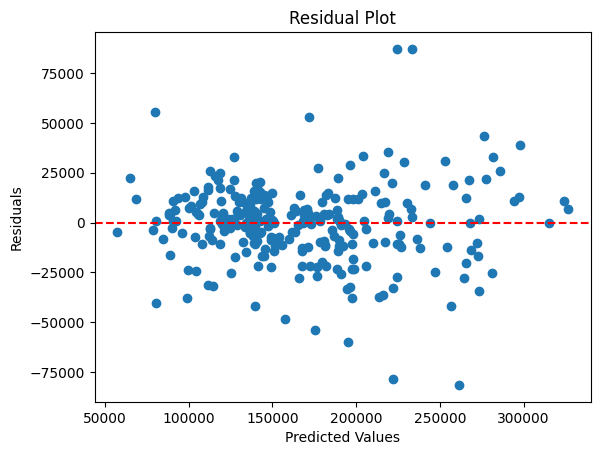

In [225]:
actual_values = y_test['SalePrice']
predicted_values = y_pred

print("Actual Values Shape:", actual_values.shape)
print("Predicted Values Shape:", predicted_values.shape)


residuals = actual_values - predicted_values

import matplotlib.pyplot as plt

plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


/tmp/ipykernel_32/796970806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=40, kde=True)


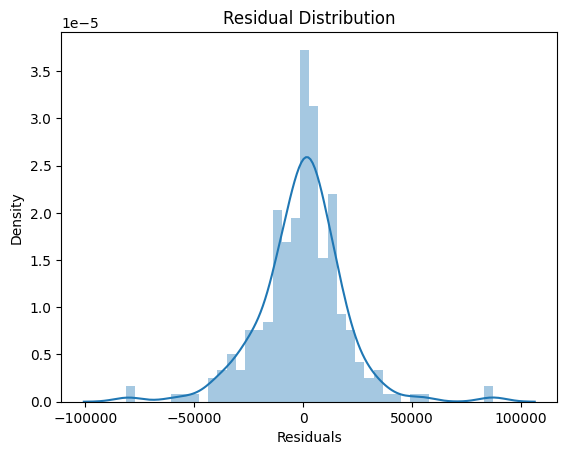

In [226]:
import seaborn as sns

sns.distplot(residuals, bins=40, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Distribution")
plt.show()


In [227]:
test = test_data.drop(columns='Id', axis=1)
predictions = final_model.predict(test)

predictions

array([124170.29, 166783.72, 189551.  , ..., 153733.16, 120377.44,
       223294.19], dtype=float32)

In [228]:
predictions = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})

predictions.to_csv('submission.csv', index=False)


# To download the file in Jupyter Notebook

from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv